# Run the server script from package data_summarization_1KGP

Prepare the request paramter selecting the individuals located in the South Asian continent having regions aligned on assembly hg19. 

In [7]:
import json
param = \
{'meta': {
    'health_status': "true",
    'super_population': ['SAS'],
    'assembly': 'hg19'
    }
}
body = json.dumps(param)
print(body)

{"meta": {"health_status": "true", "super_population_code": ["SAS"], "assembly": "hg19"}}


POST the endpoint \individuals with the prepared JSON parameter

In [8]:
import requests

r = requests.post('http://127.0.0.1:5000/individuals', json=param)
print(' response status code: {}'.format(r.status_code))
response_body = r.json()

response status code: 200


# Inspect response data:
It's a data cube with the numerosity of the individuals grouped on the free-dimensions: gender, dna_source and population (to be intended as country of origin)

In [9]:
import pandas as pd
from matplotlib import pyplot as plt
columns = response_body['columns']
rows = response_body['rows']
df = pd.DataFrame.from_records(rows, columns=columns)

# clean data: removes rows with dna_source = '' beacuse they're wrong; replaces None with ''
df.drop(df[df.dna_source == ''].index, inplace=True)
df.fillna(value='', inplace=True)

df

,samples,gender,population,dna_source
0,494,,,
1,2,male,STU,lcl
4,53,male,STU,blood
5,1,female,GIH,lcl
6,3,female,STU,lcl
7,43,female,ITU,blood
8,44,female,BEB,lcl
9,48,female,PJL,blood
10,42,male,BEB,lcl
11,48,male,PJL,blood


Total count of individuals

In [10]:
total = df.query('population == "" & dna_source == ""').iloc[0, 0]
print(total)

494


Distribution of samples across different regions of the SAS continent

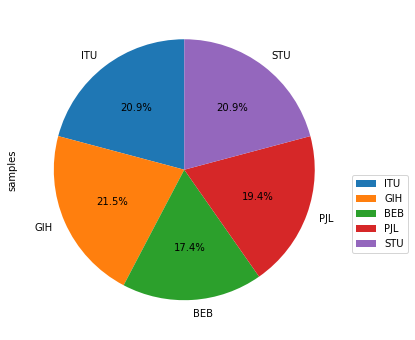

In [11]:
# to see the number of individuals in each population, we prepare an ad-hoc data structure, obtained by removing unnecessary columnms and rows form the original data source.
# unnecessary columns are gender and dna_source. Unnecessary rows, are all that ones in which dna_source or gender are != ''
df1 = df.drop(df.query('gender != "" | dna_source != "" | population == ""').index)    
columns_to_drop = ['gender', 'dna_source']
df1.drop(columns_to_drop, inplace=True, axis=1) # removes columns

pie = df1.plot(
    kind='pie',
    y='samples', 
    labels=df1['population'].tolist(),
    figsize=(6, 6),
    startangle=90, 
    autopct='%1.1f%%'
)
plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.show()

Distribution of individuals by gender and population

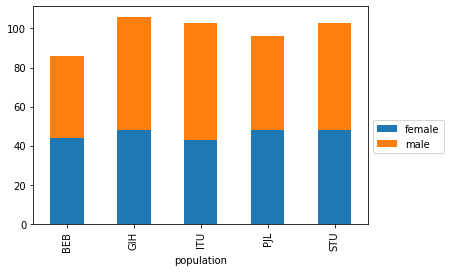

In [12]:
# prepare data frame
df2 = df.drop(df.query('gender == "" | population == "" | dna_source != ""').index)    
df2.drop(['dna_source'], inplace=True, axis=1)

df2_pivot = df2.pivot(index='population', columns='gender', values='samples') # creates a df with populations as index of rows, genders as columns, n° samples as cell values
df2_pivot.plot( # automatically uses the values of index as x-axis and stacks the values of columns
    kind='bar',
    stacked=True,
    figsize=(6, 4),
)

plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.show()